In [1]:
import numpy as np
import torch

![alt text](https://drive.google.com/uc?export=view&id=19I2SrQHTO4njMHwCYh8fcaX-qOcKKy2A)

## **Задача 2**. Cделать нейрон, соответствующий оператору НЕ.

In [7]:
class Neuron(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.fc = torch.nn.Linear(1, 1)

  def forward(self, x):
    return torch.heaviside(self.fc(x), torch.tensor([0.0]))

In [8]:
neuron = Neuron()
neuron.fc.weight, neuron.fc.bias

(Parameter containing:
 tensor([[0.3302]], requires_grad=True), Parameter containing:
 tensor([-0.4889], requires_grad=True))

In [9]:
neuron.fc.weight.data = torch.tensor([[-0.6]])
neuron.fc.bias.data = torch.tensor([0.0])

In [10]:
x = torch.tensor([0.0])
neuron(x)

tensor([0.], grad_fn=<NotImplemented>)

## **Задача 3**. Cделать нейрон, соответствующий оператору И.

In [11]:
class Neuron(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.fc = torch.nn.Linear(2, 1)

  def forward(self, x):
    return torch.heaviside(self.fc(x), torch.tensor([0.0]))

In [12]:
neuron = Neuron()
neuron.fc.weight, neuron.fc.bias

(Parameter containing:
 tensor([[ 0.4073, -0.5220]], requires_grad=True), Parameter containing:
 tensor([0.6763], requires_grad=True))

In [16]:
neuron.fc.weight.data = torch.tensor([[3.0, 3.0]])
neuron.fc.bias.data = torch.tensor([-5.0])

In [17]:
x = torch.tensor([[0.0, 0.0],
                 [0.0, 1.0],
                 [1.0, 0.0],
                 [1.0, 1.0]])
print(neuron(x))

tensor([[0.],
        [0.],
        [0.],
        [1.]], grad_fn=<NotImplemented>)


## **Задача 4**. Cделать нейрон, соответствующий оператору ИЛИ.

In [19]:
neuron.fc.weight.data = torch.tensor([[2.0, 2.0]])
neuron.fc.bias.data = torch.tensor([-1.0])

In [20]:
x = torch.tensor([[0.0, 0.0],
                 [0.0, 1.0],
                 [1.0, 0.0],
                 [1.0, 1.0]])
neuron(x)

tensor([[0.],
        [1.],
        [1.],
        [1.]], grad_fn=<NotImplemented>)

## **Задача 5**. Cделать нейрон, соответствующий оператору XOR.

In [21]:
neuron.fc.weight.data = torch.tensor([[0.0, 0.0]])
neuron.fc.bias.data = torch.tensor([0.0])

In [22]:
x = torch.tensor([0.0, 0.0])
neuron(x)

tensor([0.], grad_fn=<NotImplemented>)

Нерешаемая

## **Вопрос 1**. Какие нейронные сети могут иметь только линейную разделяющую поверхность?

С линейными функциями активации(ФА) или вообще без ФА 

## **Вопрос 2**. Имеет ли смысл соединять полносвязанные нейроны (нейроны, которые принимают на вход все выходы предыдущего слоя) с линейной функцией активации в многослойную нейронную сеть?

Нет

# Домашнее задание

Дедлайн домашнего задания - текущее воскресенье 23:59. 

**Домашнее задание 0:** Создайте репозиторий на Github. Вся дальнейшая домашка загружается туда. Чуть позже в телеграм чате будет выложена форма для сдачи.

**Домашнее задание 1:** реализуйте XOR с помощью 3 нейронов. Запишите ответ в виде выражения, состоящего из объектов neuron() – моделей нейрона с пороговой функцией активации, внутри скобок может быть что угодно. Входы верхнего уровня называются x1 и x2. Пример фрагмента записи: neuron(1*x1 + 5*x2 - 0.1) + neuron(x1) (ответ будет выглядеть чуть сложнее, но других символов вроде && не потребуется).

In [45]:
class Neuron(torch.nn.Module):
  def __init__(self, dim=(2, 1)):
    super().__init__()
    self.fc = torch.nn.Linear(*dim)
  def forward(self, x):
    return torch.heaviside(self.fc(x), torch.tensor([0.0]))
    
neuron1, neuron2, neuron3 = Neuron(), Neuron(), Neuron(dim=(1, 1))

In [46]:
neuron1.fc.weight.data = torch.tensor([[-1.0, 3.0]])
neuron1.fc.bias.data = torch.tensor([-2.0])

neuron2.fc.weight.data = torch.tensor([[3.0, -1.0]])
neuron2.fc.bias.data = torch.tensor([-2.0])
x = torch.tensor([[0.0, 0.0],
                  [0.0, 1.0],
                  [1.0, 0.0],
                  [1.0, 1.0]])
ansewer = neuron3(neuron1(x) + neuron2(x))
ansewer

tensor([[0.],
        [1.],
        [1.],
        [0.]], grad_fn=<NotImplemented>)

**Домашнее задание 2:** нарисуйте backward граф для выражения `a*b+c*d`. [Теория и пример оформления](https://www.youtube.com/watch?v=MswxJw-8PvE). Сравните полученные теоретические значения с аттрибутами grad у исходных тензоров.

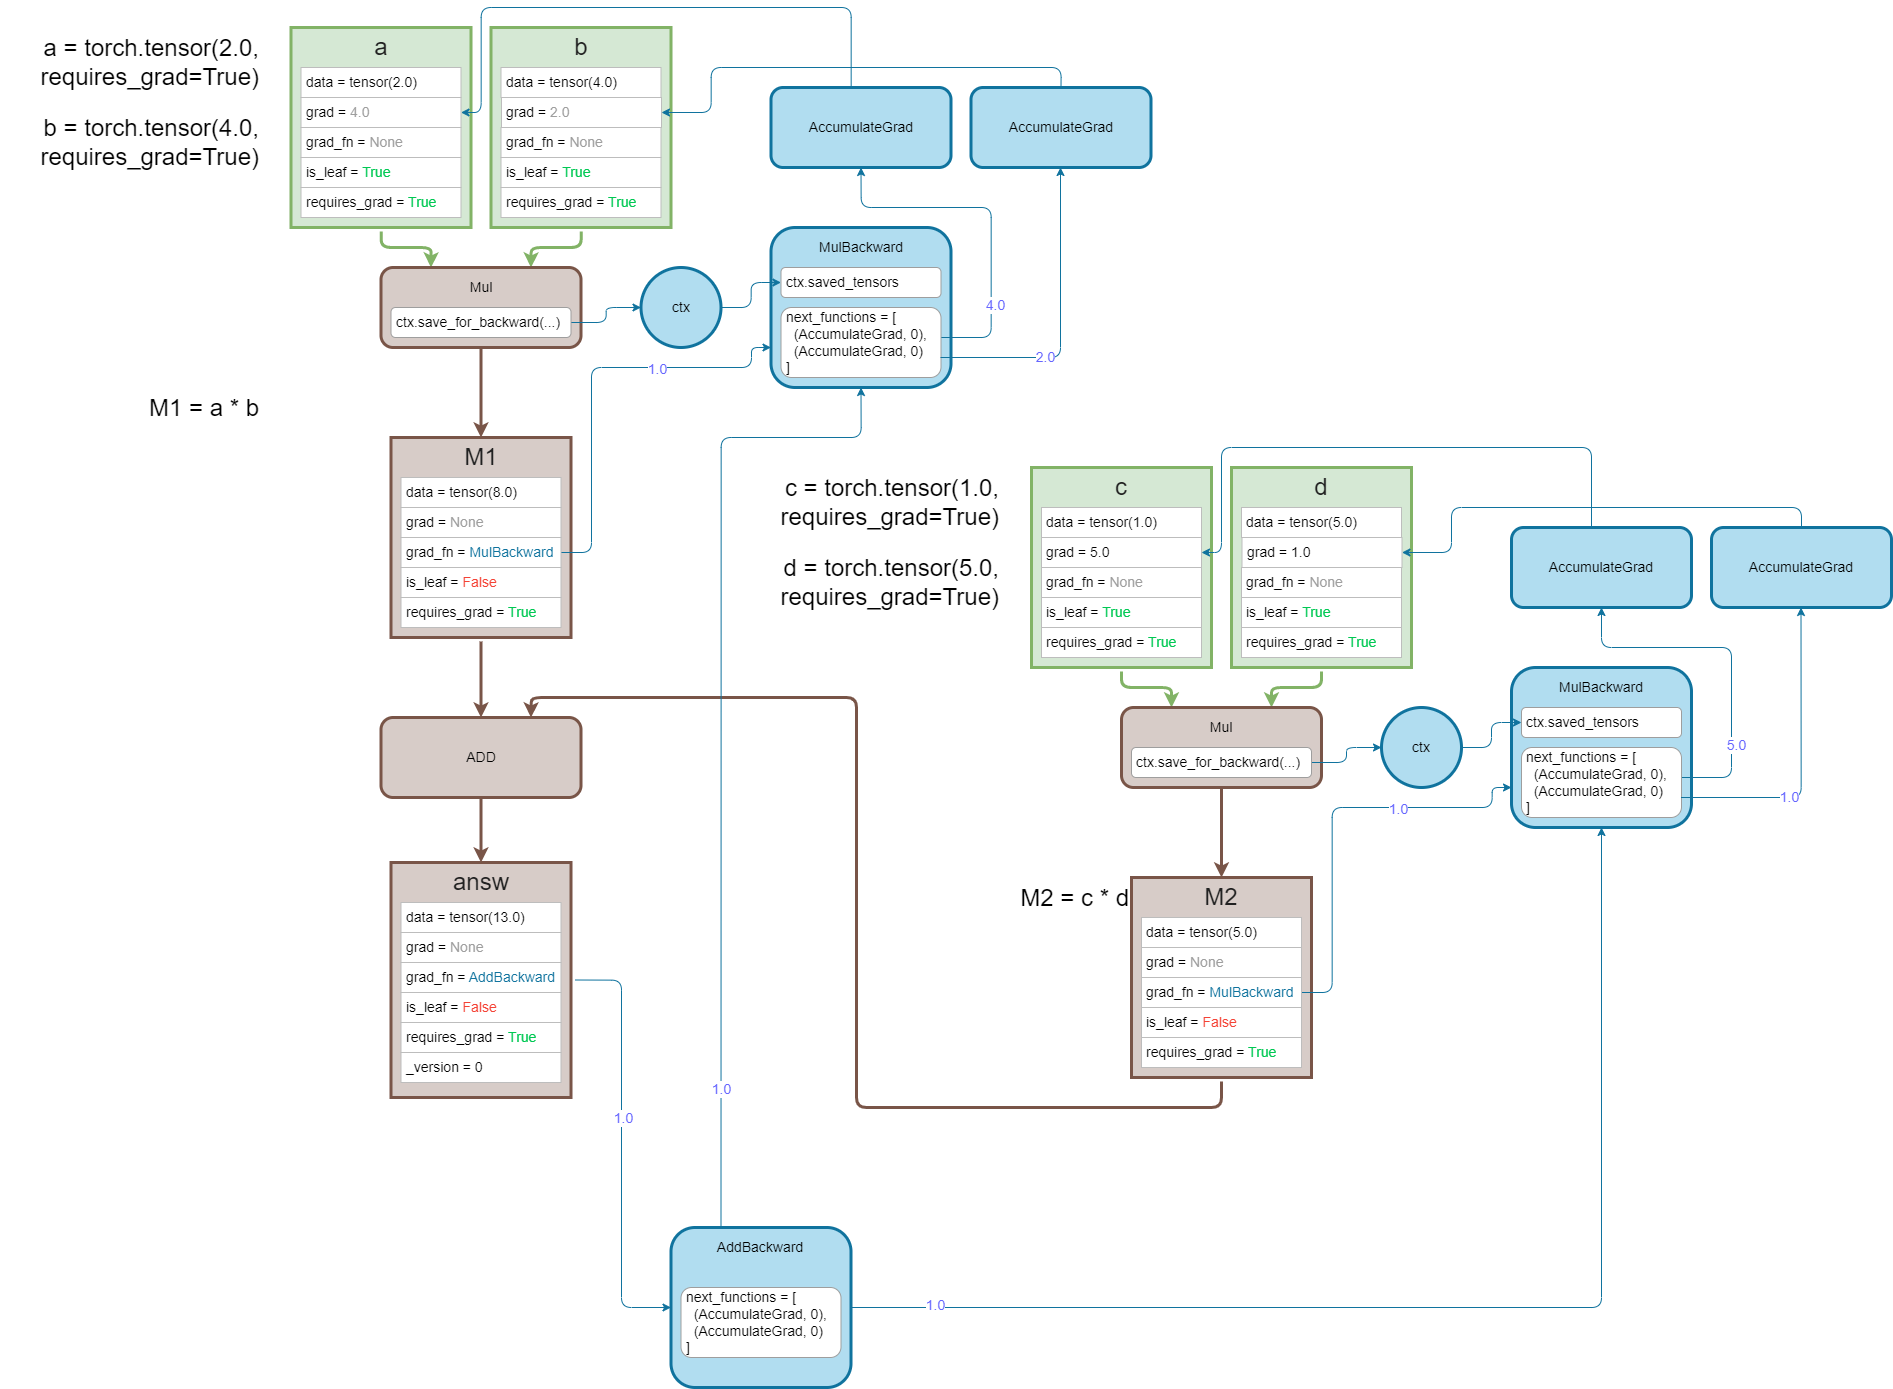

In [47]:
a = torch.tensor([2.0], requires_grad=True)
b = torch.tensor([4.0], requires_grad=True)
c = torch.tensor([1.0], requires_grad=True)
d = torch.tensor([5.0], requires_grad=False)

In [48]:
print(a.grad)

None


In [49]:
loss = a*b + c*d
loss.backward()

In [50]:
print(a.grad)
print(b.grad)
print(c.grad)
print(d.grad)

tensor([4.])
tensor([2.])
tensor([5.])
None


**Домашнее задание 3:** Поэксперементируйте с размером тензоров, которые влезут на видеоркарту в Colab. Найдите максимальный размер тензора для типа данных float32, float64, float16, int32, int64. На сколько они отличаются.

In [6]:
import torch
def allocate_empty_tensor(dim_size, dtype):
  a = torch.zeros(1, dim_size, dtype=dtype,device='cuda')

In [9]:
torch.cuda.empty_cache()
types = {
    'float32': [torch.float32, 4], 'float64': [torch.float64, 8],
    'float16': [torch.float16, 2], 'int32': [torch.int32, 4],
    'int64': [torch.int64, 8]}
for k, v in types.items():
  size = torch.cuda.mem_get_info()[0] // v[1]
  while True:
    try:
      allocate_empty_tensor(size, dtype=v[0])
      types[k].append((1, size))
      break
    except Exception as e:
      pass
    size -= 4096
  torch.cuda.empty_cache()

types

{'float32': [torch.float32, 4, (1, 983040)],
 'float64': [torch.float64, 8, (1, 491520)],
 'float16': [torch.float16, 2, (1, 1966080)],
 'int32': [torch.int32, 4, (1, 983040)],
 'int64': [torch.int64, 8, (1, 491520)]}

**Домашнее задание 4:** Напишите хороший пример неэффективного кода для занятия памяти видеокарты, который вызовет ошибку out of memory

In [3]:
dim = 2**10
while True:
  allocate_empty_tensor(dim, dtype=torch.float64)
  print(torch.cuda.memory_reserved())
  dim *= 2 

2097152
2097152
2097152
2097152
2097152
2097152
2097152
2097152
23068672
23068672
23068672
23068672
56623104
123731968
257949696
526385152
1063256064
2136997888
4284481536
8579448832
8589934592


RuntimeError: ignored

**Домашнее задание 5:** Используя один линейный слой `nn.Linear` и один входной тензор `x` подберите подберите размерности так, чтобы занимать всю видеопамять.
Попробуйте применить линейный слой к тензору `x`. Что произойдет? Кратко опишите ваши эксперименты. Что вы поняли?

In [4]:
torch.cuda.empty_cache()
fc = torch.nn.Linear(927744, 4090, device='cuda')
x = torch.zeros(927744, dtype=torch.float32, device='cuda')
answer = fc(x)

RuntimeError: ignored

In [5]:
!nvidia-smi

Sun Dec  4 18:10:47 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    27W /  70W |  15106MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

При создании на cpu тензора и слоя выделяется озу (для тензора) и без device='cude' невозможно создать тензор, занимающий больше места, чем доступно в озу.